# Training a Neural Network with the MNIST Hand-written Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import NeuralNetwork as NN
import cv2

%matplotlib inline

### Read Data and Preprocess

The data can be downloaded from https://www.kaggle.com/c/digit-recognizer/data

Each row in the csv file is a 1D array representing the image, starting at column 1. Column 0 gives the label of the image.

In [2]:
path_dataframe = '~/Física/Python/NeuralNetworks/MNIST_handwritten/train.csv'
digit_dataframe = pd.read_csv(path_dataframe)
digit_dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


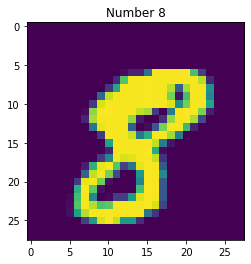

In [3]:
# A simple test

test = digit_dataframe.iloc[10].values[:]; dim = int(len(test[1:])**0.5)
label = test[0]
test = test[1:].reshape((dim,dim))
plt.imshow(test); _= plt.title(f'Number {label}')

It's import to separate the data in training data and validation data, and we should also have equally distributed
data for each number

In [4]:
# Check how many samples we have for each number

for i in range(10):
    print(f'Number {i}: '+str(digit_dataframe.loc[digit_dataframe['label'] == i].shape[0])+' samples')

Number 0: 4132 samples
Number 1: 4684 samples
Number 2: 4177 samples
Number 3: 4351 samples
Number 4: 4072 samples
Number 5: 3795 samples
Number 6: 4137 samples
Number 7: 4401 samples
Number 8: 4063 samples
Number 9: 4188 samples


We will collect 3000 samples of each number to use as training data

In [5]:
#Create empty lists
training_array_data = []; training_array_lbl = []; validation_array_data = []; validation_array_lbl = [] 

for i in range(10):
    # Create auxiliary dataframe that contains only label i
    df_aux = digit_dataframe.loc[digit_dataframe['label'] == i]
    for j in range(3000):
        training_array_data.append(df_aux.iloc[j].values[1:])
        training_array_lbl.append(i) 
    for j in range(3000, digit_dataframe.loc[digit_dataframe['label'] == i].shape[0]):
        validation_array_data.append(df_aux.iloc[j].values[1:])
        validation_array_lbl.append(i)
        
training_array_data = np.array(training_array_data)
training_array_lbl = np.array(training_array_lbl)
validation_array_data = np.array(validation_array_data)
validation_array_lbl = np.array(validation_array_lbl)

#Shuffle the training data
keys = np.array(range(training_array_data.shape[0]))
np.random.shuffle(keys)
training_array_data = training_array_data[keys]
training_array_lbl = training_array_lbl[keys]

#Delete pandas dataframe since we are going to use it anymore
del digit_dataframe

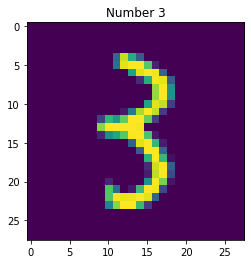

In [6]:
# Simple test again

test = training_array_data[100]; dim = int(len(test[:])**0.5)
label = training_array_lbl[100]
test = test[:].reshape((dim,dim))
plt.imshow(test); _= plt.title(f'Number {label}')

## Rescaling the data and Training our Model

We will use 2 hidden layers with 128 layers each; L2 regularization in the first layer; layer dropout with a rate of 10%; Categorical Cross Etropy for the Loss and the Adam Optimizer

In [7]:
# Rescaling the data

training_array_data = (training_array_data - 127.5) / 127.5
validation_array_data = (validation_array_data - 127.5) / 127.5

In [8]:
model = NN.Model(save_stats = True) # We will save the stats to plot later

model.add(NN.Layer_Dense(training_array_data.shape[1],128, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(NN.Activation_ReLU())
model.add(NN.Layer_Dropout(0.1))
model.add(NN.Layer_Dense(128,10))
model.add(NN.Activation_Softmax())

model.set(
    loss = NN.Loss_CategoricalCrossEntropy(),
    optimizer = NN.Optimizer_Adam(learning_rate = 0.001, decay=5e-5),
    accuracy = NN.Accuracy_Categorical())

model.finalize()

model.train(training_array_data,training_array_lbl, epochs=10, batch_size=128,
            validation_data=(validation_array_data, validation_array_lbl))

Epoch 1 training, acc: 0.801, loss: 0.758 (data_loss: 0.723, reg_loss: 0.035), lr: 0.0009884353069091628
VALIDATION, acc: 0.895, loss: 0.359
Epoch 2 training, acc: 0.900, loss: 0.380 (data_loss: 0.337, reg_loss: 0.043), lr: 0.0009770873027505008
VALIDATION, acc: 0.915, loss: 0.295
Epoch 3 training, acc: 0.921, loss: 0.323 (data_loss: 0.274, reg_loss: 0.049), lr: 0.0009659969088098919
VALIDATION, acc: 0.928, loss: 0.251
Epoch 4 training, acc: 0.932, loss: 0.285 (data_loss: 0.233, reg_loss: 0.052), lr: 0.0009551554515497397
VALIDATION, acc: 0.931, loss: 0.228
Epoch 5 training, acc: 0.941, loss: 0.259 (data_loss: 0.204, reg_loss: 0.055), lr: 0.0009445546424860678
VALIDATION, acc: 0.940, loss: 0.201
Epoch 6 training, acc: 0.947, loss: 0.239 (data_loss: 0.183, reg_loss: 0.056), lr: 0.000934186557055444
VALIDATION, acc: 0.942, loss: 0.193
Epoch 7 training, acc: 0.950, loss: 0.226 (data_loss: 0.169, reg_loss: 0.057), lr: 0.0009240436148586213
VALIDATION, acc: 0.950, loss: 0.177
Epoch 8 traini

Text(0.5, 1.0, 'Learning Rate')

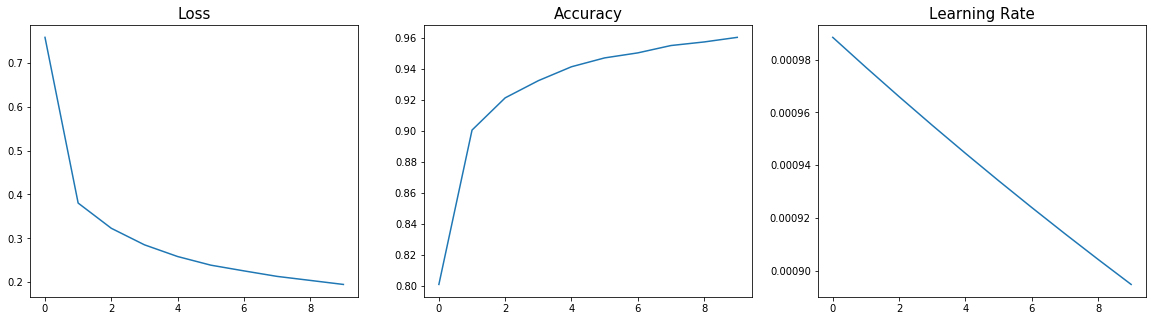

In [9]:
loss_array = np.array(model.loss_arr)
acc_array = np.array(model.acc_arr)
learning_array = np.array(model.lr_arr)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax[0].plot(range(len(loss_array)), loss_array, '-'); ax[0].set_title('Loss', fontsize=15)
ax[1].plot(range(len(acc_array)), acc_array, '-'); ax[1].set_title('Accuracy', fontsize=15)
ax[2].plot(range(len(learning_array)), learning_array, '-'); ax[2].set_title('Learning Rate', fontsize=15)

## Saving Model

**Test of our Model can be done with the DrawNumbers.py file, where the user can draw your own number with the mouse**

In [10]:
model.save('Digit_Recognizer.model')